## The call method
There will be hardly any Python user who hasn't stumbled upon exceptions like ```'dict' object is not callable or 'int' object is not callable```. After a while they find out the reason: they used parentheses (round brackets) in situations where they shouldn't have done it. Expressions like ```f(x)```, ```gcd(x, y)``` or ```sin(3.4)``` are usually used for function calls.

The question is: why do we get the message ```'dict' object is not callable``` if we write ```d('a')```, if ```d``` is a dictionary? Why doesn't it say ```'dict' object is not a function```?

First of all, when we invoke a function in Python, we also say we 'call the function'. Secondly, there are objects in Python, which are 'called' like functions but are not functions strictly speaking. There are 'lambda functions', which are defined in a different way. It is also possible to define classes, where the instances are callable like 'regular' functions. This will be achieved by adding another _magic method_: the ```__call__``` method.

Before we get to the ```__call__``` method, we have to know what a **callable** is. **In general, a "callable" is an object that can be called like a function and behaves like one**. All functions are also callables. Python provides a function with the name ```callable```. With the help of this function we can determine whether an object is callable or not. The function ```callable``` returns a Boolean truth value which indicates whether the object passed as an argument can be called like a function or not. In addition to functions, we have already seen another form of ```callables```: _classes_.

In [1]:
def the_answer(question):
    return 42
print("the_answer: ", callable(the_answer))

the_answer:  True


The ```__call__``` method can be used to turn the instances of the class into callables. Functions are callable objects. A callable object is an object which can be used and behaves like a function but might not be a function. By using the ```__call__``` method it is possible to define classes in a way that the instances will be callable objects. The ```__call__``` method is called if the instance is called "like a function", i.e. using brackets. The following class definition is the simplest possible way to define a class with a ```__call__``` method:

In [2]:
class FoodSupply:
    def __call__(self):
        return "spam"
foo = FoodSupply()
bar = FoodSupply()
print(foo(), bar())

spam spam


The previous class example is extremely simple, but useless in practical terms. Whenever we create an instance of the class, we get a callable. These callables are always defining the same constant function. A function without any input and a constant output "spam". We'll now define a class which is slightly more useful. Let us slightly improve this example:

In [3]:
class FoodSupply:
    def __init__(self, *ingredients):
        self.ingredients = ingredients
    def __call__(self):
        result = " ".join(self.ingredients) + " plus delicious spam!"
        return result
f = FoodSupply("fish", "rice")
f()

'fish rice plus delicious spam!'

Let's create another function:

In [4]:
g = FoodSupply("vegetables")
g()

'vegetables plus delicious spam!'

Now, we define a class with the name TriangleArea. This class has only one method, which is the ```__call__``` method. The ```__call__``` method calculates the area of an arbitrary triangle if the length of the three sides are given:

In [5]:
class TriangleArea:
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        return result
area = TriangleArea()
print(area(3, 4, 5))

6.0


This program returns 6.0. This class is not very exciting, even though we can create an arbitrary number of instances where each instance just executes an unaltered ```__call__``` function of the TrianlgeClass. We cannot pass parameters to the instantiation and the ```__call__``` of each instance returns the value of the area of the triangle. So each instance behaves like the area function.

After the two very didactic and not very practical examples, we want to demonstrate a more practical example with the following. We define a class that can be used to define linear equations:

In [6]:
class StraightLines():
    def __init__(self, m, c):
        self.slope = m
        self.y_intercept = c
    def __call__(self, x):
        return self.slope * x + self.y_intercept
line = StraightLines(0.4, 3)
for x in range(-5, 6):
    print(x, line(x))

-5 1.0
-4 1.4
-3 1.7999999999999998
-2 2.2
-1 2.6
0 3.0
1 3.4
2 3.8
3 4.2
4 4.6
5 5.0


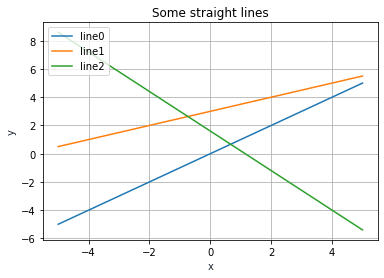

In [7]:
# We will use this class now to create some straight lines and visualize them with matplotlib
import matplotlib.pyplot as plt
import numpy as np
lines = []
lines.append(StraightLines(1, 0))
lines.append(StraightLines(0.5, 3))
lines.append(StraightLines(-1.4, 1.6))
X = np.linspace(-5,5,100)
for index, line in enumerate(lines):
    line = np.vectorize(line)
    plt.plot(X, line(X), label='line' + str(index))
plt.title('Some straight lines')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Our next example is also exciting. The class FuzzyTriangleArea defines a ```__call__``` method which implements a fuzzy behaviour in the calculations of the area. The result should be correct with a likelihood of p, e.g. 0.8. If the result is not correct the result will be in a range of ± v %. e.g. 0.1.

In [8]:
import random
class FuzzyTriangleArea:
    def __init__(self, p=0.8, v=0.1):
        self.p, self.v = p, v
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        if random.random() <= self.p:
            return result
        else:
            return random.uniform(result-self.v, 
                                  result+self.v)
area1 = FuzzyTriangleArea()
area2 = FuzzyTriangleArea(0.5, 0.2)
for i in range(12):
    print(f"{area1(3, 4, 5):4.3f}, {area2(3, 4, 5):4.2f}")

6.000, 5.85
6.000, 5.90
5.937, 5.93
6.000, 6.17
6.000, 6.00
6.052, 6.16
6.000, 6.00
5.937, 6.00
6.000, 5.94
6.000, 5.99
6.057, 6.00
6.000, 6.00


Beware that this output differs with every call! We can see the in most cases we get the right value for the area but sometimes not.

We can create many different instances of the previous class. Each of these behaves like an area function, which returns a value for the area, which may or may not be correct, depending on the instantiation parameters p and v. We can see those instances as experts (expert functions) which return in most cases the correct answer, if we use p values close to 1. If the value v is close to zero, the error will be small, if at all. The next task would be merging such experts, let's call them exp1, exp2, ..., expn to get an improved result. We can perform a vote on the results, i.e. we will return the value which is most often occurring as the correct value. Alternatively, we can calculate the arithmetic mean. We will implement both possibilities in our class FuzzyTriangleArea:

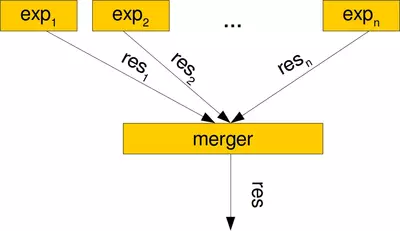

In [9]:
from random import uniform, random
from collections import Counter
class FuzzyTriangleArea:
    def __init__(self, p=0.8, v=0.1):
        self.p, self.v = p, v
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        if random() <= self.p:
            return result
        else:
            return uniform(result-self.v, 
                                  result+self.v)
class MergeExperts:
    def __init__(self, mode, *experts):
        self.mode, self.experts = mode, experts
    def __call__(self, a, b, c):
        results= [exp(a, b, c) for exp in self.experts]
        if self.mode == "vote":
            c = Counter(results)
            return c.most_common(1)[0][0]
        elif self.mode == "mean":
            return sum(results) / len(results)
rvalues = [(uniform(0.7, 0.9), uniform(0.05, 0.2)) for _ in range(20)]
experts = [FuzzyTriangleArea(p, v) for p, v in rvalues]
merger1 = MergeExperts("vote", *experts)
print(merger1(3, 4, 5))
merger2 = MergeExperts("mean", *experts)
print(merger2(3, 4, 5))

6.0
6.006665220165538


The following example defines a class with which we can create abitrary polynomial functions:

In [13]:
class Polynomial:
    def __init__(self, *coefficients):
        self.coefficients = coefficients[::-1]
    def __call__(self, x):
        res = 0
        for index, coeff in enumerate(self.coefficients):
            res += coeff * x** index
        return res
# a constant function
p1 = Polynomial(42)
# a straight Line
p2 = Polynomial(0.75, 2)
# a third degree Polynomial
p3 = Polynomial(1, -0.5, 0.75, 2)
for i in range(1, 10):
    print("index =", i, ";", "p1 =", p1(i), ";", "p2 =", p2(i), ";", "p3 =", p3(i))

index = 1 ; p1 = 42 ; p2 = 2.75 ; p3 = 3.25
index = 2 ; p1 = 42 ; p2 = 3.5 ; p3 = 9.5
index = 3 ; p1 = 42 ; p2 = 4.25 ; p3 = 26.75
index = 4 ; p1 = 42 ; p2 = 5.0 ; p3 = 61.0
index = 5 ; p1 = 42 ; p2 = 5.75 ; p3 = 118.25
index = 6 ; p1 = 42 ; p2 = 6.5 ; p3 = 204.5
index = 7 ; p1 = 42 ; p2 = 7.25 ; p3 = 325.75
index = 8 ; p1 = 42 ; p2 = 8.0 ; p3 = 488.0
index = 9 ; p1 = 42 ; p2 = 8.75 ; p3 = 697.25
